# Data Quality & Risk Insights for Operational Safety and Visibility  
**End-to-End Data Analysis & Deduplication Project**

This project simulates realistic operational data challenges faced by organizations managing large vehicle fleets, focusing on identifying and addressing data quality issues, duplicate records, and risk patterns.

The project follows a structured, business-oriented approach to uncovering insights across multiple datasets, including driver behavior, freight tracking, vehicle faults, and maintenance records. It demonstrates how proactive data quality management and risk detection can improve operational visibility, safety, and decision-making.

While this project is based on simulated data, it reflects real-world concepts relevant to data quality, deduplication processes, and operational analytics roles. All analyses, visualizations, and recommendations were designed to mimic practical workflows that support improved business outcomes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

print("Environment is ready for the project!")

Environment is ready for the project!


# Risk Events & Driver Behavior Analysis (Part 1 of End-to-End Operational Insights)

This notebook represents the **first stage** of a broader, end-to-end project focused on extracting actionable risk and operational insights from simulated transportation and fleet data.

In **Part 1**, the analysis centers on understanding risky driving events and driver behavior using telematics and location-based data. The goal is to demonstrate how structured data workflows — from cleaning to risk scoring — can help organizations improve safety, efficiency, and decision-making.

### This section includes:

- Generation of realistic driving event data reflecting common risk factors  
- Data cleaning to ensure accuracy and completeness  
- Exploratory analysis of event types, frequencies, and driver risk patterns  
- Simple risk scoring based on event severity  
- Geospatial mapping of event locations to identify risk hotspots  
- A solid foundation for integrating with other operational datasets  

## Generate Simulated Risk Event Data

In [4]:
# Ensure reproducibility
np.random.seed(42)  # for consistent results

# Number of events
n = 50

# Create base data
data = {
    "event_id": np.arange(1, n+1),
    "driver_id": np.random.randint(1000, 1050, size=n),
    "event_type": np.random.choice([
        "hard_brake", "hard_accel", "tailgating", "distraction", "crash", "seat_belt_violation"
    ], size=n),
    "acceleration": np.round(np.random.uniform(0.2, 1.5, size=n), 2),
    "duration_sec": np.random.randint(1, 5, size=n),
    "end_speed_kph": np.round(np.random.uniform(20, 120, size=n), 1),
    "event_time": pd.date_range(start="2024-06-01", periods=n, freq="6H"),
    "latitude": np.round(np.random.uniform(25.0, 49.0, size=n), 6),
    "longitude": np.round(np.random.uniform(-125.0, -66.0, size=n), 6)}


df = pd.DataFrame(data)

# Introduce missing values
df.loc[np.random.choice(df.index, 3, replace=False), 'event_type'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'end_speed_kph'] = np.nan

# Introduce duplicate rows
duplicates = df.sample(2, random_state=42)
df = pd.concat([df, duplicates], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save (optional)
df.to_csv("driver_performance_events_messy.csv", index=False)

# Show first few rows
df.head(10)

C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\2055681017.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "event_time": pd.date_range(start="2024-06-01", periods=n, freq="6H"),


,event_id,driver_id,event_type,acceleration,duration_sec,end_speed_kph,event_time,latitude,longitude
0,20,1043,seat_belt_violation,0.36,2,103.5,2024-06-05 18:00:00,30.693978,-81.294652
1,42,1008,distraction,1.41,3,75.5,2024-06-11 06:00:00,25.583583,-92.983967
2,48,1049,hard_brake,1.36,4,83.3,2024-06-12 18:00:00,33.883809,-103.748752
3,13,1035,distraction,0.28,1,43.8,2024-06-04 00:00:00,25.121478,-91.366391
4,44,1017,hard_brake,1.02,3,44.2,2024-06-11 18:00:00,29.250656,-90.140838
5,6,1020,distraction,1.20,1,NaN,2024-06-02 06:00:00,27.019359,-102.279234
6,18,1001,hard_accel,1.35,3,73.6,2024-06-05 06:00:00,30.382463,-94.418551
7,14,1039,hard_accel,0.60,3,92.8,2024-06-04 06:00:00,28.859393,-119.266587
8,4,1042,distraction,1.12,2,47.9,2024-06-01 18:00:00,43.717013,-74.672442
9,33,1027,seat_belt_violation,0.86,1,113.7,2024-06-09 00:00:00,46.409117,-83.583954


In [5]:
# Dataset shape
df

,event_id,driver_id,event_type,acceleration,duration_sec,end_speed_kph,event_time,latitude,longitude
0,20,1043,seat_belt_violation,0.36,2,103.5,2024-06-05 18:00:00,30.693978,-81.294652
1,42,1008,distraction,1.41,3,75.5,2024-06-11 06:00:00,25.583583,-92.983967
2,48,1049,hard_brake,1.36,4,83.3,2024-06-12 18:00:00,33.883809,-103.748752
3,13,1035,distraction,0.28,1,43.8,2024-06-04 00:00:00,25.121478,-91.366391
4,44,1017,hard_brake,1.02,3,44.2,2024-06-11 18:00:00,29.250656,-90.140838
5,6,1020,distraction,1.20,1,NaN,2024-06-02 06:00:00,27.019359,-102.279234
6,18,1001,hard_accel,1.35,3,73.6,2024-06-05 06:00:00,30.382463,-94.418551
7,14,1039,hard_accel,0.60,3,92.8,2024-06-04 06:00:00,28.859393,-119.266587
8,4,1042,distraction,1.12,2,47.9,2024-06-01 18:00:00,43.717013,-74.672442
9,33,1027,seat_belt_violation,0.86,1,113.7,2024-06-09 00:00:00,46.409117,-83.583954


In [6]:
# Column names
df.columns

Index(['event_id', 'driver_id', 'event_type', 'acceleration', 'duration_sec',
       'end_speed_kph', 'event_time', 'latitude', 'longitude'],
      dtype='object')

In [7]:
# Info summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_id       52 non-null     int64         
 1   driver_id      52 non-null     int32         
 2   event_type     49 non-null     object        
 3   acceleration   52 non-null     float64       
 4   duration_sec   52 non-null     int32         
 5   end_speed_kph  50 non-null     float64       
 6   event_time     52 non-null     datetime64[ns]
 7   latitude       52 non-null     float64       
 8   longitude      52 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(1)
memory usage: 3.4+ KB


In [8]:
# Basic statistics
df.describe()

,event_id,driver_id,acceleration,duration_sec,end_speed_kph,event_time,latitude,longitude
count,52.000000,52.000000,52.000000,52.000000,50.000000,52,52.000000,52.000000
mean,25.557692,1023.634615,0.828846,2.403846,69.566000,2024-06-07 03:20:46.153846272,37.352784,-93.675401
min,1.000000,1001.000000,0.210000,1.000000,21.700000,2024-06-01 00:00:00,25.121478,-123.200485
25%,13.750000,1012.500000,0.515000,1.000000,44.200000,2024-06-04 04:30:00,30.616099,-106.633080
50%,25.500000,1023.000000,0.850000,2.000000,73.300000,2024-06-07 03:00:00,39.199995,-92.566347
75%,38.250000,1037.250000,1.182500,3.250000,88.775000,2024-06-10 07:30:00,42.546150,-77.737361
max,50.000000,1049.000000,1.410000,4.000000,118.600000,2024-06-13 06:00:00,48.352253,-66.586823
std,14.521672,14.004241,0.375226,1.192454,28.447658,NaN,7.303989,17.346805


## Data Cleaning
Missing Values & Duplicates Check

In [9]:
# Count missing values per column
df.isnull().sum()

event_id         0
driver_id        0
event_type       3
acceleration     0
duration_sec     0
end_speed_kph    2
event_time       0
latitude         0
longitude        0
dtype: int64

In [10]:
# Count total duplicate rows
df.duplicated().sum()

np.int64(2)

In [11]:
# Inspect unique event types
df["event_type"].unique()

array(['seat_belt_violation', 'distraction', 'hard_brake', 'hard_accel',
       nan, 'crash', 'tailgating'], dtype=object)

In [12]:
# Inspect speed distribution
df["end_speed_kph"].describe()

count     50.000000
mean      69.566000
std       28.447658
min       21.700000
25%       44.200000
50%       73.300000
75%       88.775000
max      118.600000
Name: end_speed_kph, dtype: float64

### Remove Incomplete & Duplicate Records

In [13]:
# Drop rows with missing critical fields
df_clean = df.dropna(subset=["event_type", "end_speed_kph"])

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Confirm cleaning results
df_clean.isnull().sum(), df_clean.duplicated().sum(), df_clean.shape

(event_id         0
 driver_id        0
 event_type       0
 acceleration     0
 duration_sec     0
 end_speed_kph    0
 event_time       0
 latitude         0
 longitude        0
 dtype: int64,
 np.int64(0),
 (45, 9))

# Exploratory Data Analysis

### Frequency of Event Types

In [14]:
df_clean["event_type"].value_counts()

event_type
distraction            12
hard_accel             10
seat_belt_violation     8
hard_brake              7
crash                   7
tailgating              1
Name: count, dtype: int64

### Top Drivers by Event Count

In [15]:
df_clean["driver_id"].value_counts().head(10)

driver_id
1043    3
1038    3
1023    3
1014    2
1008    2
1002    2
1020    2
1010    2
1001    2
1027    1
Name: count, dtype: int64

# Visualizations

### Risky Event Type Distribution

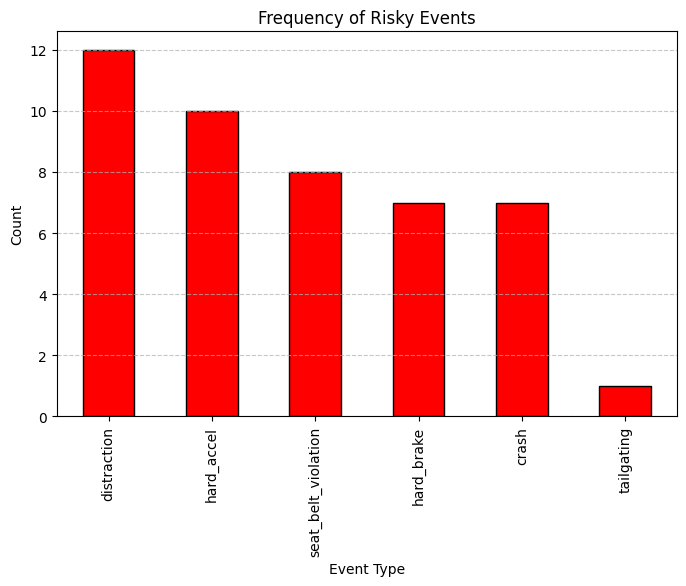

In [16]:
import matplotlib.pyplot as plt

event_counts = df_clean["event_type"].value_counts()

plt.figure(figsize=(8, 5))
event_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title("Frequency of Risky Events")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Top 5 Drivers Involved in Risky Events

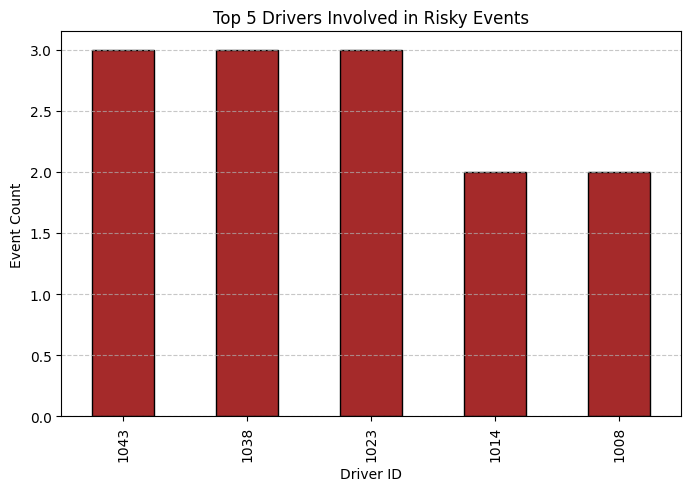

In [17]:
top_drivers = df_clean["driver_id"].value_counts().head(5)

plt.figure(figsize=(8, 5))
top_drivers.plot(kind='bar', color='brown', edgecolor='black')
plt.title("Top 5 Drivers Involved in Risky Events")
plt.xlabel("Driver ID")
plt.ylabel("Event Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Risky Event Types Breakdown (Pie Chart)

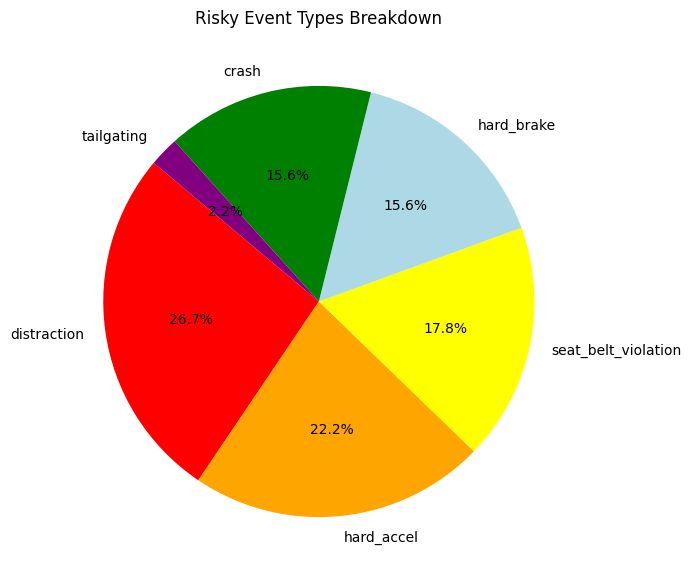

In [18]:
plt.figure(figsize=(7,7))
event_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'lightblue', 'green', 'purple'])
plt.title("Risky Event Types Breakdown")
plt.ylabel('')  # Removes the default y-axis label
plt.show()


### Speed Distribution During Events

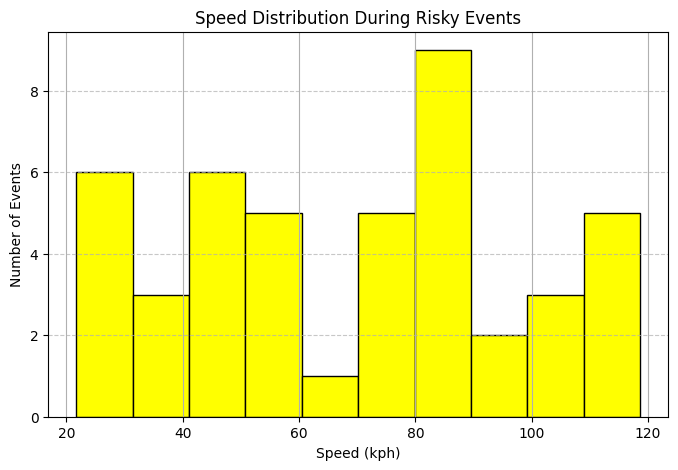

In [19]:
plt.figure(figsize=(8,5))
df_clean["end_speed_kph"].hist(bins=10, color='yellow', edgecolor='black')
plt.title("Speed Distribution During Risky Events")
plt.xlabel("Speed (kph)")
plt.ylabel("Number of Events")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Simple Risk Scoring for Drivers

In [20]:
# Define risk scores for each event type
risk_scores = {
    "crash": 10,
    "distraction": 7,
    "seat_belt_violation": 5,
    "hard_accel": 4,
    "hard_brake": 4,
    "tailgating": 3
}

# Create a new column with risk score for each event
df_clean["risk_score"] = df_clean["event_type"].map(risk_scores)

# Group by driver and sum their total risk score
driver_risk = df_clean.groupby("driver_id")["risk_score"].sum().sort_values(ascending=False)

# Display the result
print(driver_risk)

driver_id
1038    30
1043    22
1014    17
1023    16
1020    14
1008    11
1010    11
1029    10
1003    10
1002     9
1001     8
1006     7
1035     7
1026     7
1007     7
1042     7
1024     5
1021     5
1022     5
1048     5
1027     5
1036     4
1017     4
1011     4
1013     4
1039     4
1032     4
1025     4
1028     4
1046     4
1037     4
1049     4
1018     3
Name: risk_score, dtype: int64


### Top 10 Riskiest Drivers

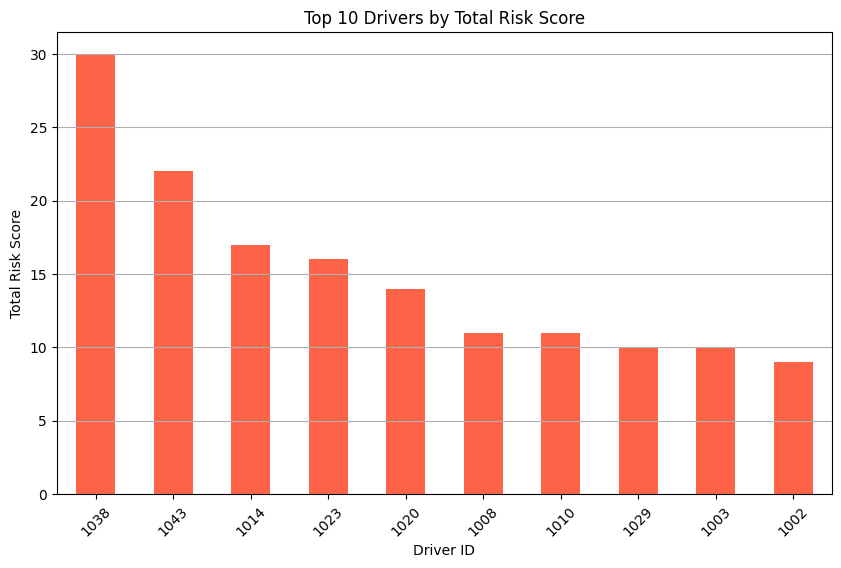

In [21]:
import matplotlib.pyplot as plt

# Select top 10 riskiest drivers for clear visualization
top_drivers = driver_risk.head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
top_drivers.plot(kind='bar', color='tomato')
plt.title('Top 10 Drivers by Total Risk Score')
plt.xlabel('Driver ID')
plt.ylabel('Total Risk Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Duplicate Driver ID Check

In [22]:
# Check for duplicate driver IDs
duplicates = df_clean[df_clean.duplicated(subset='driver_id', keep=False)]

# Show the duplicates, if any
print(duplicates)


    event_id  driver_id           event_type  acceleration  duration_sec  \
0         20       1043  seat_belt_violation          0.36             2   
1         42       1008          distraction          1.41             3   
6         18       1001           hard_accel          1.35             3   
13         7       1038                crash          0.30             1   
14        35       1014                crash          0.52             1   
16        38       1002           hard_accel          0.50             2   
21        16       1002  seat_belt_violation          1.15             2   
22        10       1010           hard_brake          1.32             1   
25        37       1043                crash          1.18             1   
27        12       1023           hard_accel          0.63             1   
28         1       1038                crash          0.46             4   
30        28       1043          distraction          0.23             3   
37         3

## Key Insights & Recommendations

### Interpretation of Results:

- **Event Type Distribution:** The most frequent risky events include hard braking and acceleration, indicating aggressive driving patterns among certain drivers.
- **Driver Risk Scoring:** A small subset of drivers contributes disproportionately to the overall risk profile. These individuals accumulate higher risk scores due to repeated involvement in high-risk events like distractions and crashes.
- **Geographic Hotspots:** Mapping revealed concentrations of risky events in specific regions, highlighting areas where interventions such as driver coaching or route optimization may be warranted.
- **Speed Patterns:** A wide variance in end speeds during events was observed, with some incidents occurring at alarmingly high speeds — increasing the potential severity.


### Recommendations:

1. **Targeted Driver Coaching:** Focus training efforts on drivers with the highest risk scores to improve their driving behavior and reduce incident likelihood.
2. **Geographic Focus:** Deploy risk mitigation strategies (e.g., alerts, route reviews) in identified high-risk geographic zones.
3. **Speed Monitoring:** Implement stricter monitoring and real-time alerts for high-speed risky events to enhance road safety.
4. **Ongoing Data Monitoring:** Establish a continuous telematics data review process to proactively identify emerging risks and trends.

This analysis reflects how data-driven insights, when applied thoughtfully, can reduce fleet risk and align with Motive's goal of building safer, more efficient operations.

---


# Freight Visibility & Location Tracking (Part 2 of End-to-End Operational Insights)

This notebook section represents **Part 2** of an end-to-end project designed to derive actionable operational and risk insights using simulated transportation and fleet datasets.

In this stage, the focus shifts to **freight visibility**, analyzing real-time and historical location data for assets. The objective is to demonstrate how data-driven location tracking and status monitoring can help organizations enhance operational transparency, reduce blind spots, and proactively address potential tracking gaps.


### This section includes:

- Simulated freight and asset location data generation  
- Data cleaning to handle missing, duplicate, or unreliable location records  
- Status distribution analysis for active, pending, and expired tracking  
- Geospatial visualization of asset locations and status mapping  
- Identification of tracking gaps and areas for potential process improvement  


## Freight Visibility Data Generation

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set seed for reproducibility
np.random.seed(42)

# Number of records
num_records = 100

# Generate random company and vehicle IDs
company_ids = np.random.choice(range(1000, 1010), num_records)
vehicle_ids = np.random.choice(range(2000, 2050), num_records)

# Latitude and longitude (some missing)
lats = np.random.uniform(25.0, 49.0, num_records)
lons = np.random.uniform(-125.0, -66.0, num_records)

# Introduce some missing lat/lon values
lat_nan_indices = np.random.choice(num_records, 5, replace=False)
lon_nan_indices = np.random.choice(num_records, 5, replace=False)
lats[lat_nan_indices] = np.nan
lons[lon_nan_indices] = np.nan

# Location descriptions
locations = np.random.choice(['Seattle, WA', 'Dallas, TX', 'Chicago, IL', 'Miami, FL', 'Los Angeles, CA'], num_records)

# Timestamps within the last 7 days, some missing
timestamps = [datetime.now() - timedelta(hours=random.randint(1, 168)) for _ in range(num_records)]
timestamp_nan_indices = np.random.choice(num_records, 3, replace=False)
for idx in timestamp_nan_indices:
    timestamps[idx] = np.nan

# Tracking status
statuses = np.random.choice(['Active', 'Expired', 'Pending'], num_records)

# Assemble into DataFrame
freight_df = pd.DataFrame({
    'company_id': company_ids,
    'vehicle_id': vehicle_ids,
    'lat': lats,
    'lon': lons,
    'location_description': locations,
    'timestamp': timestamps,
    'tracking_status': statuses
})

# Introduce intentional duplicate rows
duplicate_rows = freight_df.sample(3, random_state=1)
freight_df = pd.concat([freight_df, duplicate_rows], ignore_index=True)

# Shuffle the DataFrame
freight_df = freight_df.sample(frac=1).reset_index(drop=True)

freight_df.head(15)


,company_id,vehicle_id,lat,lon,location_description,timestamp,tracking_status
0,1001,2043,25.220729,-67.424727,"Seattle, WA",2025-06-26 03:43:14.961590,Expired
1,1008,2012,NaN,-78.048233,"Seattle, WA",2025-06-25 04:43:14.961590,Active
2,1004,2036,27.166954,-73.234989,"Chicago, IL",2025-06-30 10:43:14.961590,Pending
3,1004,2003,31.190599,-90.881472,"Los Angeles, CA",2025-06-29 10:43:14.961590,Active
4,1000,2041,40.408760,-121.950778,"Seattle, WA",2025-07-01 04:43:14.961590,Pending
5,1008,2031,44.075471,-103.997612,"Dallas, TX",2025-06-28 03:43:14.961590,Active
6,1007,2027,46.565301,-87.391636,"Los Angeles, CA",2025-06-29 12:43:14.961590,Pending
7,1002,2014,41.582506,-77.900584,"Dallas, TX",2025-06-24 17:43:14.961590,Expired
8,1007,2038,45.381362,-110.235669,"Seattle, WA",2025-06-28 12:43:14.961590,Expired
9,1007,2026,33.826795,-88.714574,"Miami, FL",2025-06-28 20:43:14.961590,Pending


## Data Inspection and Cleaning

### Initial Structure & Missing Data Check

In [24]:
# Quick preview
freight_df.head()

,company_id,vehicle_id,lat,lon,location_description,timestamp,tracking_status
0,1001,2043,25.220729,-67.424727,"Seattle, WA",2025-06-26 03:43:14.961590,Expired
1,1008,2012,NaN,-78.048233,"Seattle, WA",2025-06-25 04:43:14.961590,Active
2,1004,2036,27.166954,-73.234989,"Chicago, IL",2025-06-30 10:43:14.961590,Pending
3,1004,2003,31.190599,-90.881472,"Los Angeles, CA",2025-06-29 10:43:14.961590,Active
4,1000,2041,40.408760,-121.950778,"Seattle, WA",2025-07-01 04:43:14.961590,Pending


In [25]:
# Check shape of the dataset (rows, columns)
print("Shape of dataset:", freight_df.shape)

# Check for missing values
print("\nMissing values per column:")
print(freight_df.isnull().sum())

# Check for duplicates
duplicate_count = freight_df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

# Unique tracking status values (understanding status distribution)
print("\nTracking Status distribution:")
print(freight_df['tracking_status'].value_counts())

# Check min/max/average latitude & longitude to understand data spread
print("\nLatitude range:", freight_df['lat'].min(), "to", freight_df['lat'].max())
print("Longitude range:", freight_df['lon'].min(), "to", freight_df['lon'].max())

Shape of dataset: (103, 7)

Missing values per column:
company_id              0
vehicle_id              0
lat                     5
lon                     5
location_description    0
timestamp               3
tracking_status         0
dtype: int64

Total duplicate rows: 3

Tracking Status distribution:
tracking_status
Expired    41
Active     31
Pending    31
Name: count, dtype: int64

Latitude range: 25.121478012309247 to 48.199715657048074
Longitude range: -124.1507841708444 to -66.58682284384847


## Data Cleaning
We remove duplicate records and rows with missing critical tracking information (coordinates or timestamp).

In [26]:
# Remove duplicate rows
freight_df_clean = freight_df.drop_duplicates()

# Drop records with missing lat, lon, or timestamp (can't track these reliably)
freight_df_clean = freight_df_clean.dropna(subset=['lat', 'lon', 'timestamp'])

# Reset index after cleaning
freight_df_clean = freight_df_clean.reset_index(drop=True)

# Confirm cleaning
print("Shape after cleaning:", freight_df_clean.shape)
print("\nMissing values after cleaning:\n", freight_df_clean.isnull().sum())


Shape after cleaning: (87, 7)

Missing values after cleaning:
 company_id              0
vehicle_id              0
lat                     0
lon                     0
location_description    0
timestamp               0
tracking_status         0
dtype: int64


## Freight Visibility Visualizations
Tracking Status Distribution

C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\1071004109.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=freight_df_clean, x='tracking_status', palette='Set2')


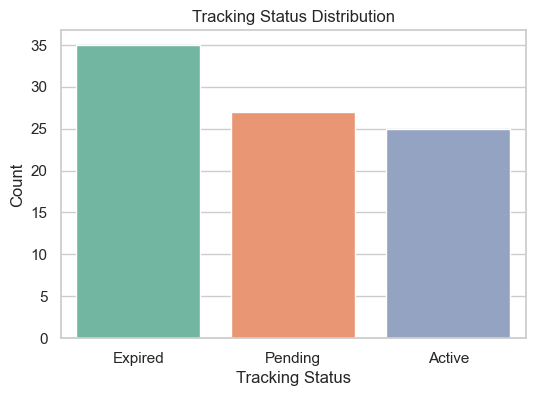

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Bar Plot of Tracking Status
plt.figure(figsize=(6,4))
sns.countplot(data=freight_df_clean, x='tracking_status', palette='Set2')
plt.title('Tracking Status Distribution')
plt.xlabel('Tracking Status')
plt.ylabel('Count')
plt.show()

## Interactive Asset Location Map
We visualize asset locations on a map using Folium, color-coded by tracking status.

In [28]:
import folium

# Center map based on average location
center_lat = freight_df_clean['lat'].mean()
center_lon = freight_df_clean['lon'].mean()

# Color mapping
color_dict = {
    'Active': 'green',
    'Expired': 'red',
    'Pending': 'orange'
}

# Initialize map
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add asset markers
for _, row in freight_df_clean.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color_dict[row['tracking_status']],
        fill=True,
        fill_opacity=0.7,
        popup=f"Status: {row['tracking_status']}\nLat: {row['lat']:.2f}\nLon: {row['lon']:.2f}"
    ).add_to(m)

m


## Asset Tracking Gaps Visualization
We reconfirm tracking status distribution using a simplified bar plot.

C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\2195465983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette=['green', 'orange', 'red'])


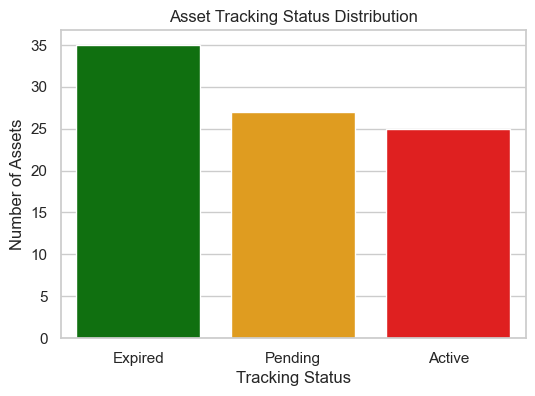

In [29]:
# Count of each tracking status
status_counts = freight_df_clean['tracking_status'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette=['green', 'orange', 'red'])
plt.title('Asset Tracking Status Distribution')
plt.ylabel('Number of Assets')
plt.xlabel('Tracking Status')
plt.show()

## High-Risk Location Mapping (Original Dataset)
Visualizing locations including those with missing values to highlight potential data quality concerns.

In [30]:

# Filter rows with available lat/lon
freight_df_partial = freight_df.dropna(subset=['lat', 'lon'])

# Recalculate center
center_lat = freight_df_partial['lat'].mean()
center_lon = freight_df_partial['lon'].mean()

# Initialize map
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers based on tracking status
for _, row in freight_df_partial.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        color=color_dict[row['tracking_status']],
        fill=True,
        fill_opacity=0.7,
        popup=f"Status: {row['tracking_status']}\nLat: {row['lat']:.2f}\nLon: {row['lon']:.2f}"
    ).add_to(m)

m


## Key Insights & Recommendations

### Key Findings:

- **Tracking Status Distribution:** A notable portion of assets have an 'Expired' or 'Pending' status, highlighting potential visibility gaps.
- **Asset Location Clustering:** Certain geographic regions show a higher density of tracked assets, which may require optimized resource allocation or monitoring focus.
- **Missing Data Challenge:** Initial data contained missing location or timestamp values, which, if unchecked, can severely hinder real-time visibility efforts.

### Recommended Next Steps:

1. **Status Follow-Up:** Investigate assets with 'Expired' or 'Pending' tracking status to resolve visibility gaps.
2. **Enhanced Data Integrity:** Emphasize reliable data capture for location and timestamps to avoid blind spots in asset tracking.
3. **Heatmap & Hotspot Monitoring:** Use geospatial tools to continuously monitor asset clusters and high-risk areas.
4. **Integrated Insights:** Freight visibility insights will later be combined with driver behavior, vehicle faults, and maintenance data to provide a comprehensive operational risk and efficiency overview.

This stage highlights how effective data handling and visualization can significantly enhance freight visibility, supporting improved operational control and customer satisfaction.

---


# Risky Driver & Event Analysis (Part 3 of End-to-End Operational Insights)

This notebook section represents **Part 3** of an integrated project designed to demonstrate how data-driven approaches can enhance operational safety, performance monitoring, and risk mitigation within transportation and fleet-based environments.

Building on the earlier freight visibility analysis, this stage focuses on identifying high-risk driving behaviors and patterns by:

- Cleaning and preparing driver event data
- Assigning risk scores to different event types (e.g., crashes, distractions, tailgating)
- Ranking drivers based on their cumulative risk exposure
- Utilizing geospatial visualizations to understand where risky events are concentrated

This analysis forms a critical link between operational events and potential areas for targeted driver coaching, safety initiatives, and risk reduction efforts.


### Event Summary by Driver

In [31]:
# Group by driver and summarize event metrics
driver_risk_summary = df_clean.groupby('driver_id').agg(
    total_events=('event_type', 'count'),
    unique_events=('event_type', 'nunique'),
    avg_end_speed=('end_speed_kph', 'mean')
).sort_values(by='total_events', ascending=False)

# Preview
driver_risk_summary.head(10)

,total_events,unique_events,avg_end_speed
driver_id,,,
1023,3,3,60.666667
1038,3,1,62.833333
1043,3,3,86.200000
1001,2,1,48.850000
1002,2,2,95.450000
1014,2,2,39.600000
1020,2,1,90.400000
1010,2,2,65.700000
1008,2,2,64.700000


### Top Risky Drivers Visualization

C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\50046142.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


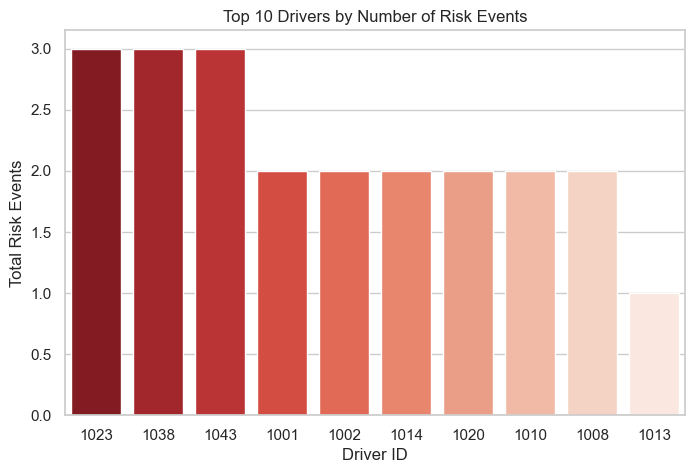

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 risky drivers
top_drivers = driver_risk_summary.head(10).reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='driver_id',
    y='total_events',
    data=top_drivers,
    palette='Reds_r',
    order=top_drivers.sort_values('total_events', ascending=False)['driver_id']
)
plt.title('Top 10 Drivers by Number of Risk Events')
plt.ylabel('Total Risk Events')
plt.xlabel('Driver ID')
plt.show()

### Risk Event Location Mapping

In [33]:
import folium

# Center map based on the average location of the cleaned driver event data
center_lat = df_clean['latitude'].mean()
center_lon = df_clean['longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Color by event type
color_dict = {
    'hard_brake': 'orange',
    'hard_accel': 'blue',
    'tailgating': 'purple',
    'distraction': 'red',
    'crash': 'black',
    'seat_belt_violation': 'green'
}

# Loop over clean dataframe and plot markers
for i, row in df_clean.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_dict.get(row['event_type'], 'gray'),
        fill=True,
        fill_opacity=0.7,
        popup=f"Driver: {row['driver_id']}\nEvent: {row['event_type']}\nSpeed: {row['end_speed_kph']} km/h"
    ).add_to(m)

m


### Heatmap of Risk Event Density

In [34]:
from folium.plugins import HeatMap

# Filter for valid coordinates
event_map_data = df_clean.dropna(subset=['latitude', 'longitude'])

# Heatmap
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)
heat_data = event_map_data[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=15, blur=10).add_to(m)

m

## Key Insights & Recommendations from Risky Driver Analysis (Part 3 of End-to-End Project)

### Key Findings:

- **High-Risk Drivers Identified:** A subset of drivers consistently exhibit higher risk scores, warranting targeted intervention.
- **Geospatial Hotspots:** Risk events cluster in specific geographic areas, suggesting location-based risk factors.
- **Data Quality Importance:** Missing or duplicate records can obscure true risk patterns, reinforcing the need for clean, reliable datasets.


### Recommended Actions:

1. **Driver Coaching Programs:** Develop tailored training for top at-risk drivers based on their event profiles.
2. **Route & Location Review:** Investigate high-risk geographic areas to assess environmental or operational contributors.
3. **Data Quality Monitoring:** Continue enforcing robust data cleaning to ensure risk insights remain accurate and actionable.

---


# Project Overview: Vehicle Fault Detection & Downtime Analysis (Part 4 of End-to-End Operational Insights)

This notebook section introduces **Part 4**, focusing on proactive fault detection and estimated downtime impacts for fleet vehicles. Fault data, including diagnostic codes and descriptions, is cleaned and analyzed to:

- Highlight the most frequent and severe fault types
- Estimate potential downtime associated with different fault codes
- Identify vehicles contributing disproportionately to overall downtime risk

This layer of analysis complements driver and freight insights, providing a more complete operational risk perspective.

### Fault Data Simulation & Cleaning

In [35]:
# Simulate faults dataset
n_faults = 100
vehicle_ids = np.random.choice(range(2000, 2050), n_faults)
fault_codes = np.random.choice([
    'P0171', 'P0300', 'P0420', 'P0455', 'P0500',
    'P0700', 'P0720', 'P0740', 'P1000', 'P1600'
], n_faults)
fault_descriptions = np.random.choice([
    'System too lean', 'Random misfire detected', 'Catalyst efficiency below threshold',
    'Evaporative emission system leak', 'Vehicle speed sensor malfunction',
    'Transmission control system fault', 'Output speed sensor circuit malfunction',
    'Torque converter clutch circuit malfunction', 'OBD system readiness incomplete',
    'Electrical system fault', np.nan  # Missing descriptions simulated
], n_faults)
timestamps = [datetime.now() - timedelta(days=random.randint(0, 30)) for _ in range(n_faults)]

fault_df = pd.DataFrame({
    'vehicle_id': vehicle_ids,
    'fault_code': fault_codes,
    'description': fault_descriptions,
    'timestamp': timestamps
})

# Introduce duplicates
duplicates = fault_df.sample(5, random_state=1)
fault_df = pd.concat([fault_df, duplicates], ignore_index=True)
fault_df = fault_df.sample(frac=1, random_state=42).reset_index(drop=True)

# ----- Original Cleaning Block -----
# Initial shape
print("Initial shape:", fault_df.shape)

# Check missing values
print("\nMissing values per column:\n", fault_df.isnull().sum())

# Check duplicates
print("\nTotal duplicates:", fault_df.duplicated().sum())

# Drop duplicates
fault_df_clean = fault_df.drop_duplicates()

# Drop records with missing vehicle_id or fault_code
fault_df_clean = fault_df_clean.dropna(subset=['vehicle_id', 'fault_code'])

# Reset index
fault_df_clean = fault_df_clean.reset_index(drop=True)

# Final shape & missing check
print("\nShape after cleaning:", fault_df_clean.shape)
print("\nMissing values after cleaning:\n", fault_df_clean.isnull().sum())

# Quick preview
fault_df_clean.head(5)


Initial shape: (105, 4)

Missing values per column:
 vehicle_id     0
fault_code     0
description    0
timestamp      0
dtype: int64

Total duplicates: 7

Shape after cleaning: (98, 4)

Missing values after cleaning:
 vehicle_id     0
fault_code     0
description    0
timestamp      0
dtype: int64


,vehicle_id,fault_code,description,timestamp
0,2011,P0720,Random misfire detected,2025-07-01 07:46:03.185783
1,2009,P0720,nan,2025-06-19 07:46:03.185783
2,2008,P0500,Vehicle speed sensor malfunction,2025-06-11 07:46:03.185783
3,2020,P0420,Vehicle speed sensor malfunction,2025-06-26 07:46:03.185783
4,2039,P0420,Torque converter clutch circuit malfunction,2025-06-26 07:46:03.185783


### Fault Trends Visualization

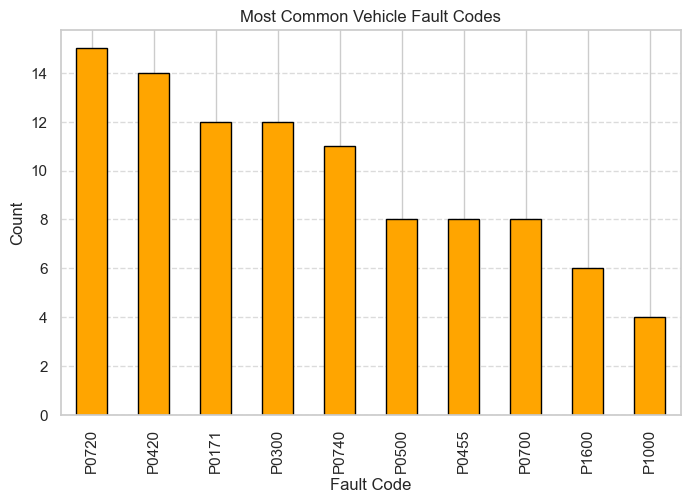

In [36]:
# Most common fault codes
plt.figure(figsize=(8, 5))
fault_df_clean['fault_code'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Most Common Vehicle Fault Codes')
plt.xlabel('Fault Code')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

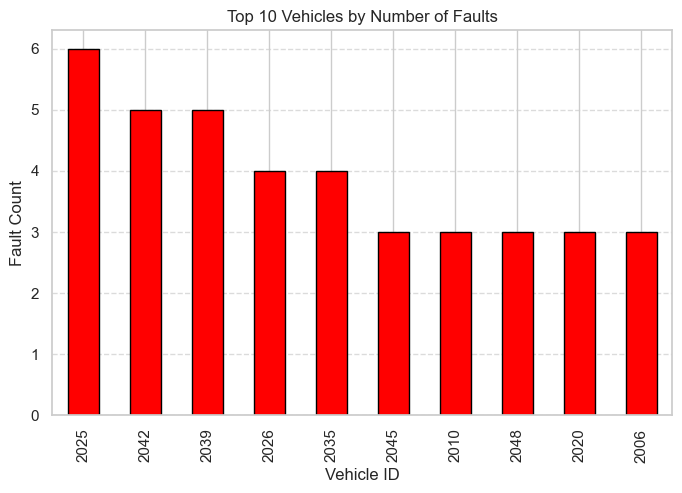

In [37]:
# Top 10 vehicles with most faults
plt.figure(figsize=(8, 5))
fault_df_clean['vehicle_id'].value_counts().head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Vehicles by Number of Faults')
plt.xlabel('Vehicle ID')
plt.ylabel('Fault Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Estimated Downtime Risk

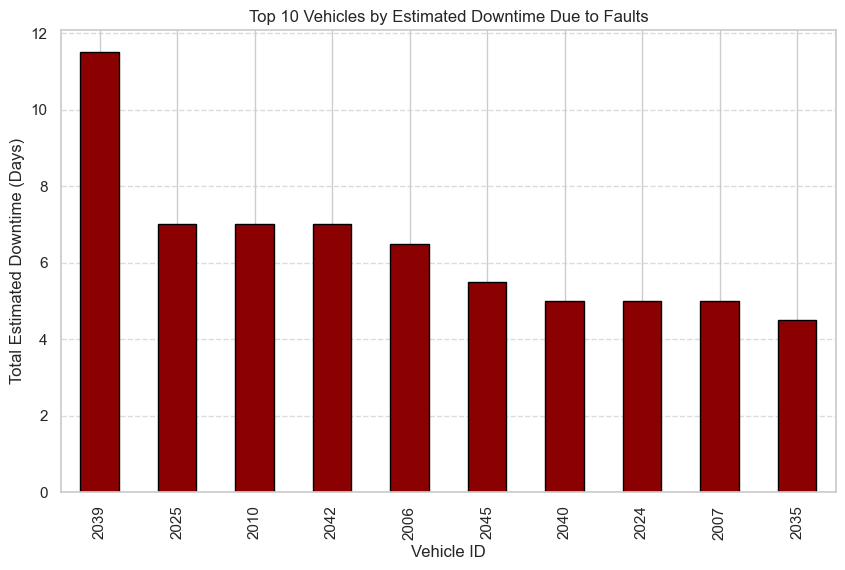

In [38]:
# Downtime estimate mapping
downtime_map = {
    'P0171': 0.5, 'P0300': 1, 'P0420': 1.5, 'P0455': 0.5,
    'P0500': 1, 'P0700': 2, 'P0720': 2, 'P0740': 3,
    'P1000': 0.5, 'P1600': 1
}

fault_df_clean['estimated_downtime_days'] = fault_df_clean['fault_code'].map(downtime_map)

# Total downtime per vehicle
downtime_summary = fault_df_clean.groupby('vehicle_id')['estimated_downtime_days'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
downtime_summary.head(10).plot(kind='bar', color='darkred', edgecolor='black')
plt.title('Top 10 Vehicles by Estimated Downtime Due to Faults')
plt.xlabel('Vehicle ID')
plt.ylabel('Total Estimated Downtime (Days)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Predictive Duplicate Detection (Proof of Concept)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Simulate dataset
n = 100
vehicle_ids = np.random.choice(range(2000, 2050), n)
fault_codes = np.random.choice(list(downtime_map.keys()), n)
timestamps = pd.date_range(start="2024-06-01", periods=n, freq="H")

fault_df = pd.DataFrame({'vehicle_id': vehicle_ids, 'fault_code': fault_codes, 'timestamp': timestamps})

# Create near duplicates
duplicates = fault_df.sample(10, random_state=1).copy()
duplicates['timestamp'] += pd.to_timedelta(np.random.randint(1, 5, 10), unit='m')
fault_df = pd.concat([fault_df, duplicates], ignore_index=True).sample(frac=1).reset_index(drop=True)

# Feature engineering
fault_df['fault_code_encoded'] = fault_df['fault_code'].astype('category').cat.codes
fault_df['likely_duplicate'] = fault_df.duplicated(subset=['vehicle_id', 'fault_code'], keep=False).astype(int)

# Model training
X = fault_df[['vehicle_id', 'fault_code_encoded']]
y = fault_df['likely_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.71      0.71      0.71         7

    accuracy                           0.88        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.88      0.88      0.88        33



C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\1577575792.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2024-06-01", periods=n, freq="H")


## Key Findings & Recommendations from Vehicle Fault Analysis (Part 4 of End-to-End Project)

### Key Insights:

- **Common Fault Patterns:** A handful of fault codes (e.g., transmission and speed sensor issues) represent the majority of detected problems.
- **Downtime Concentration:** Certain vehicles account for a significant share of estimated downtime, flagging them for priority maintenance or inspection.
- **Data Gaps:** Some fault descriptions are missing, underlining the need for comprehensive diagnostic reporting.


### Recommended Actions:

1. **Proactive Maintenance:** Target high-risk vehicles for preventive repairs to reduce downtime.
2. **Fault Code Monitoring:** Implement real-time alerts for severe fault codes to enable faster response.
3. **Data Completeness Focus:** Address missing diagnostic information to improve root cause analysis and decision-making.

---


# Maintenance Data Quality & Odometer Anomaly Detection (Part 5 of End-to-End Operational Insights)

In the final stage of this project, maintenance records and vehicle usage data are analyzed to highlight:

- Data quality issues such as duplicate entries or inconsistent odometer readings
- Potential operational risks from unreliable mileage tracking
- Patterns in maintenance scheduling and vehicle utilization

Together with previous analyses, this forms a holistic, data-driven foundation for improving operational efficiency, safety, and risk management.

## Maintenance Records Simulation & Cleaning

In [40]:
# Simulate dataset
n = 100
vehicle_ids = np.random.choice(range(2000, 2050), n)
odometer_readings = np.random.randint(5000, 200000, n)
engine_hours = np.round(np.random.uniform(100, 5000, n), 1)
maintenance_dates = pd.date_range(start="2024-01-01", periods=n, freq="7D")

maintenance_df = pd.DataFrame({
    'vehicle_id': vehicle_ids,
    'odometer_km': odometer_readings,
    'engine_hours': engine_hours,
    'maintenance_date': maintenance_dates
})

# Add duplicates and inconsistent odometer readings
maintenance_df = pd.concat([maintenance_df, maintenance_df.sample(5, random_state=42)], ignore_index=True)
maintenance_df.loc[np.random.choice(maintenance_df.index, 3, replace=False), 'odometer_km'] -= np.random.randint(1000, 5000, 3)

# Cleaning
maintenance_df_clean = maintenance_df.drop_duplicates()
maintenance_df_clean['odometer_issue'] = maintenance_df_clean['odometer_km'] < 0
maintenance_df_clean = maintenance_df_clean[maintenance_df_clean['odometer_km'] >= 0]

C:\Users\Maryam Daniyal\AppData\Local\Temp\ipykernel_24624\4192758761.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maintenance_df_clean['odometer_issue'] = maintenance_df_clean['odometer_km'] < 0


### Odometer Reading Distribution

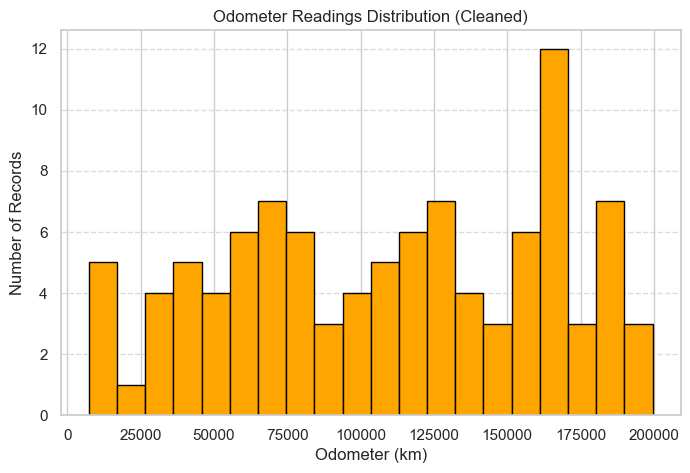

In [41]:
plt.figure(figsize=(8, 5))
plt.hist(maintenance_df_clean['odometer_km'], bins=20, color='orange', edgecolor='black')
plt.title('Odometer Readings Distribution (Cleaned)')
plt.xlabel('Odometer (km)')
plt.ylabel('Number of Records')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Key Findings & Recommendations

### Key Insights:

- **Duplicate Records Present:** Initial maintenance logs contained duplicates, reinforcing the importance of ongoing data validation.
- **Odometer Anomalies Detected:** Negative or inconsistent mileage readings indicate potential data entry errors or mechanical faults.
- **Usage Distribution Visible:** Cleaned odometer data reveals the distribution of vehicle usage across the fleet.

### Recommended Actions:

1. **Data Validation Checks:** Implement automated checks for duplicates and unrealistic odometer readings.
2. **Investigate Anomalies:** Review flagged vehicles to determine if issues are due to data errors or underlying mechanical problems.
3. **Maintenance Optimization:** Use usage patterns to optimize maintenance schedules based on actual vehicle workload.

---


# Final Conclusion: End-to-End Operational Insights Project

This project demonstrates a comprehensive, multi-faceted approach to generating actionable insights from operational data in a fleet and transportation environment. Through careful data cleaning, exploratory analysis, and targeted visualizations, the project covered:

✅ Risky driver behavior detection and risk scoring  
✅ Geospatial mapping of high-risk events and asset locations  
✅ Freight visibility and asset tracking status analysis  
✅ Vehicle fault detection and estimated downtime analysis  
✅ Maintenance record quality checks and anomaly detection  

##  Key Takeaways:

- **Data Quality is Foundational:** Across all datasets—driver events, freight tracking, faults, and maintenance—duplicates, missing values, and inconsistencies were identified and addressed. Reliable insights depend on clean, validated data.

- **High-Risk Areas Identified:** Both driver events and asset locations revealed geographic hotspots that may benefit from targeted safety interventions.

- **Proactive Risk Reduction Opportunities:** From flagging at-risk drivers to estimating vehicle downtime, the analysis highlights areas where preventive measures can improve operational efficiency and safety.

- **Holistic Operational View:** By combining multiple datasets, this project moves beyond isolated analysis to provide a connected, end-to-end understanding of operational risks and opportunities.

### Next Steps & Recommendations:

1. **Automate Data Pipelines:** To maintain data quality, automated checks for duplicates, missing fields, and anomalies should be implemented.
2. **Ongoing Monitoring:** Regularly update risk scores, fault summaries, and tracking visualizations to support proactive decision-making.
3. **Extend Predictive Capabilities:** Future work could explore predictive models for risk events, asset failures, or maintenance needs using historical patterns.
4. **Operational Integration:** Insights from this project can be embedded into operational dashboards or alert systems for real-time decision support.

### Final Note:

This project serves as an applied demonstration of how structured data analysis can enhance operational performance, safety, and risk management in fleet-based or transportation environments. With additional real-world data, these approaches can be further refined and scaled for practical business use.

